In [2]:
import cv2
import numpy as np


def bilinear(path):
    # defining function bilinear - 1 argument path

    # reads image
    image = cv2.imread(path)
    width = image.shape[0]
    height = image.shape[1]
    scale = int(4)
    # the factor by which the image is to be scaled
    # size of output image after rescaling
    n_width = width * scale
    n_height = height * scale
    # extract's features of image
    im_rgb = []
    # an empty list
    b = np.array([[0, 1], [1, 1]])
    # 2x2 NumPy array used for Interpolation
    b_inv = np.linalg.inv(b)
    # Inverse of array B

    for i in range(3):
        # Iterating for each color channel
        channel_in = image[:, :, i]
        # assigning image shape to channel_in
        channel_out = np.zeros((n_width, n_height), dtype=np.uint8)
        # defining a 3d array of zeros with the resized width and height

        bottom_row = channel_in[-1, :]
        # add an extra row padding to the bottom of array
        vertical_padding = np.vstack((channel_in, bottom_row))
        # Stacking vertically
        rightmost_column = vertical_padding[:, -1]
        # add an extra row padding to the right of the array
        horizontal_padding = np.c_[vertical_padding, rightmost_column]
        # pads last column of array
        F = np.zeros((width, height, 2, 2))

        for x in range(width):
            for y in range(height):
                f = np.array([[horizontal_padding[x][y], horizontal_padding[x][y + 1]],
                              [horizontal_padding[x + 1][y], horizontal_padding[x + 1][y + 1]]])
                F[x][y] = f
        # above loop creates 2x2 array 'F' and it stores 4 nearest neighbour pixel for each pixel in input image

        for x in range(n_width):
            # iterating resized width
            x_ori = (x / n_width) * width
            # calculating corresponding x position in original image
            x_interp = x_ori - np.floor(x_ori)
            # calculating difference produced of x interpolation
            x_int = int(np.floor(x_ori))
            # finding the nearest neighbour of x
            for y in range(n_height):
                # iterating resized height
                y_ori = (y / n_height) * height
                # calculating corresponding y position in original image
                y_interp = y_ori - np.floor(y_ori)
                # calculating difference produced of y interpolation
                y_int = int(np.floor(y_ori))
                # finding the nearest neighbour of y

                if x_interp == 0.0 and y_interp == 0.0:
                    # x_interp and y_interp are both 0, then the current pixel lies on a pixel in the original image
                    channel_out[x][y] = channel_in[int(x_ori)][int(y_ori)]
                else:
                    X = np.expand_dims(np.array([x_interp ** 1, x_interp ** 0]), axis=0)
                    Y = np.expand_dims(np.array([y_interp ** 1, y_interp ** 0]), axis=1)
                    # calculates the interpolated value by creating matrices X and Y
                    F_interp = F[x_int][y_int]

                    interpolated_value = X.dot(b_inv).dot(F_interp).dot(b_inv).dot(Y)
                    # calculates the interpolated value by using the B and B_inv matrices and matrix multiplication

                    if interpolated_value < 0:
                        interpolated_value = 0
                    elif interpolated_value > 255:
                        interpolated_value = 255
                    # Bounding Interpolated Value
                    channel_out[x][y] = interpolated_value

        im_rgb.append(channel_out)
        # resized channel is added to the list im_rgb
    im_rgb_out = cv2.merge((im_rgb[0], im_rgb[1], im_rgb[2]))
    # The three resized color channels are merged back into a single image & stored in the variable image_rgb_output
    print("Bilinear: // Completed//")

    return im_rgb_out
    # final resized image is returned as output from the function


In [3]:
def psnr(img1, img2):
    mse = np.mean((np.array(img1) - np.array(img2)) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

In [4]:
from PIL import Image
import numpy as np

def crop_image(image, crop_coords):
    """
    Crop an image based on the provided coordinates and return the cropped image.
    :param image: NumPy array or PIL Image object representing the input image.
    :param crop_coords: Tuple (left, upper, right, lower) specifying the crop coordinates.
    :return: Cropped image as a NumPy array or PIL Image object.
    """
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    cropped_image = image.crop(crop_coords)
    return cropped_image

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

input_folder = "/content/drive/MyDrive/Master_Thesis/DATASET/test_dataset/Set14/LRbicx4/"
output_folder = "/content/drive/MyDrive/Master_Thesis/Bilinear_Interpolation/Results/Set14/"
original_folder = "/content/drive/MyDrive/Master_Thesis/DATASET/test_dataset/Set14/original/"
scale = 4
names = []
for image_name in os.listdir(input_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, image_name)
        scaled_image = bilinear(image_path)  # Apply bicubic interpolation
        names.append(image_name)
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, scaled_image)
        image = cv2.imread(image_path)



Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//
Bilinear: // Completed//


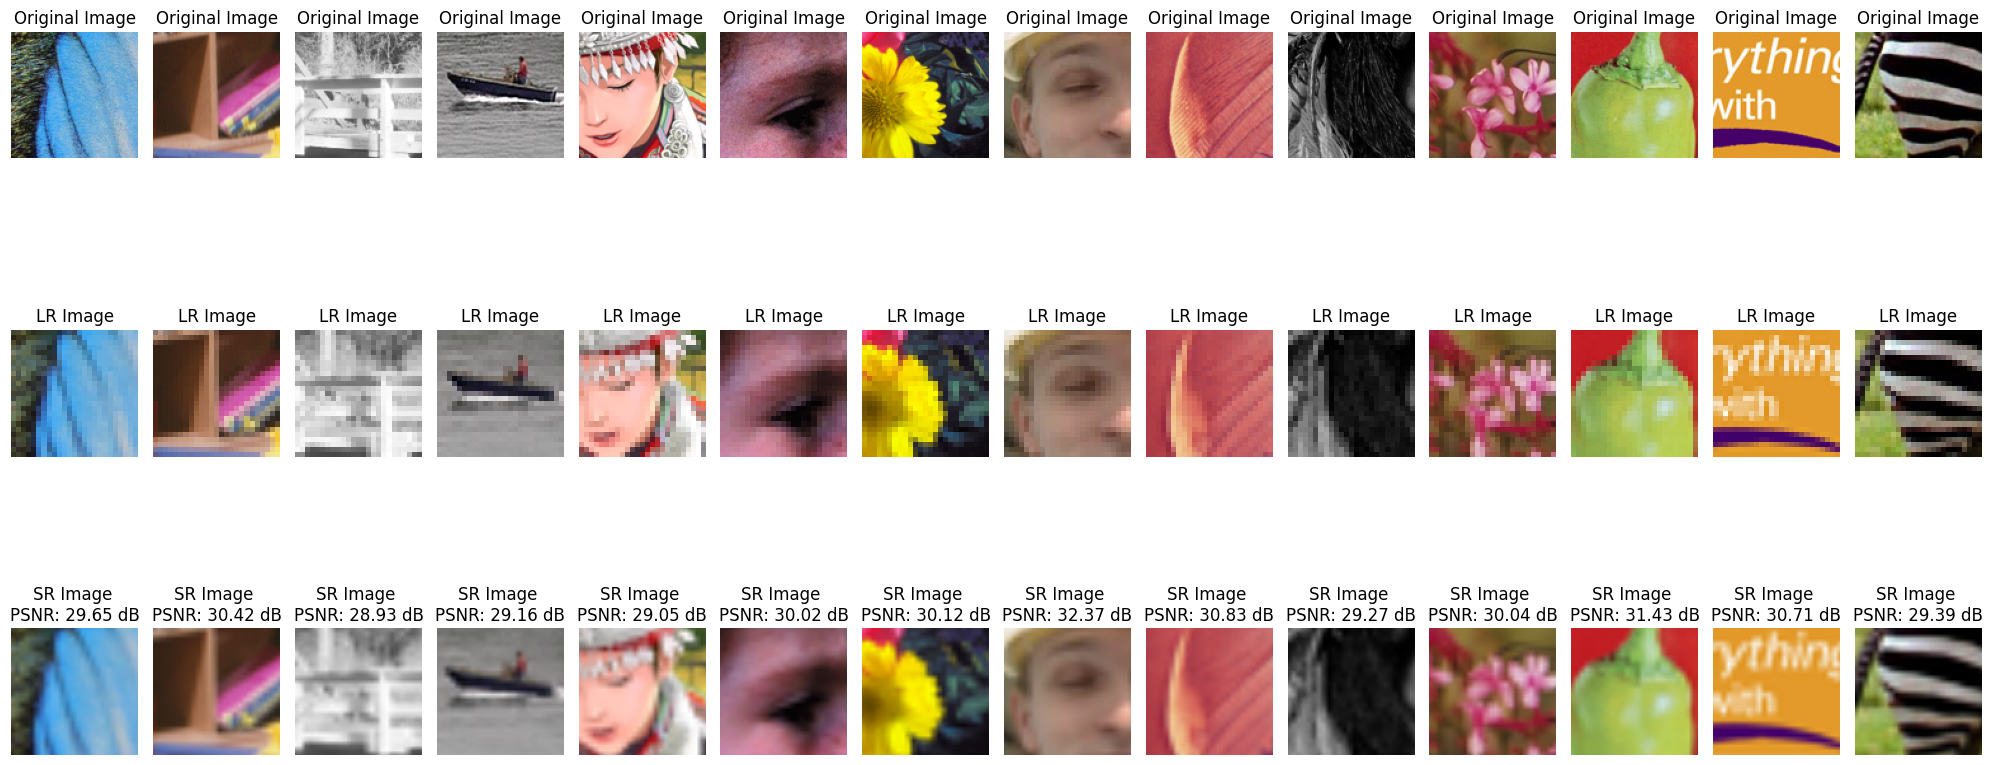

In [34]:
lr_crop_coords = (25, 25, 50, 50)
SR_HR_coords = (100,100,200,200)

fig, axes = plt.subplots(3, 14, figsize=(20, 10))

input_files = os.listdir(input_folder)
original_files = os.listdir(original_folder)
model_pred_files = os.listdir(output_folder)

input_files.sort()
original_files.sort()
model_pred_files.sort()

# Select only the first 5 images
input_files = input_files[:]
original_files = original_files[:]
model_pred_files = model_pred_files[1:]

psnr_dict={}

for i in range(len(input_files)):

    # Read the LR and HR images
    lr_img = cv2.imread(os.path.join(input_folder, input_files[i]))
    og_img = cv2.imread(os.path.join(original_folder, original_files[i]))
    sr_img = cv2.imread(os.path.join(output_folder, model_pred_files[i]))

    # Convert BGR to RGB for plotting
    lr_img = cv2.cvtColor(lr_img, cv2.COLOR_BGR2RGB)
    og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)
    sr_img = cv2.cvtColor(sr_img, cv2.COLOR_BGR2RGB)

    #Crop Images
    lr_img = crop_image(lr_img, lr_crop_coords)
    og_img = crop_image(og_img, SR_HR_coords)
    sr_img = crop_image(sr_img,SR_HR_coords)


    calculate_psnr = psnr(np.array(og_img),np.array(sr_img))
    psnr_dict[names[i]] = calculate_psnr

    # Plot the LR image
    axes[0, i].imshow(og_img)
    axes[0, i].set_title("Original Image")
    axes[0, i].axis("off")

    # Plot the HR image
    axes[1, i].imshow(lr_img)
    axes[1, i].set_title("LR Image")
    axes[1, i].axis("off")

    # Plot the HR image
    axes[2, i].imshow(sr_img)
    axes[2, i].set_title(f"SR Image \nPSNR: {calculate_psnr:.2f} dB")
    axes[2, i].axis("off")

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Master_Thesis/Bilinear_Interpolation/Results/Set14/Bilinear_Interpolation_x4_plot.png')

In [37]:
for i, (key, value) in enumerate(psnr_dict.items()):
    print(f"{i}: {key}: {value:.2f} dB")

0: baboon.png: 29.65 dB
1: barbara.png: 30.42 dB
2: bridge.png: 28.93 dB
3: coastguard.png: 29.16 dB
4: comic.png: 29.05 dB
5: face.png: 30.02 dB
6: flowers.png: 30.12 dB
7: foreman.png: 32.37 dB
8: lenna.png: 30.83 dB
9: man.png: 29.27 dB
10: monarch.png: 30.04 dB
11: pepper.png: 31.43 dB
12: ppt3.png: 30.71 dB
13: zebra.png: 29.39 dB
